In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from scipy import stats



/home/degnaiyu/.local/lib/python3.8/site-packages/pandas/compat/_optional.py:149: UserWarning: Pandas requires version '1.3.1' or newer of 'bottleneck' (version '1.2.1' currently installed).
  warnings.warn(msg, UserWarning)


# Data handling 

**Suicide data of countries maintained by WHO:**

In [ ]:
suicidedata =pd.read_csv('who_suicide_statistics.csv')
suicidedata= suicidedata.rename(columns={'country': 'Country'})  # uppercasing the column name 
suicidedata= suicidedata.dropna()  # dropping row that misses values 
suicidedata 

,Country,year,sex,age,suicides_no,population
24,Albania,1987,female,15-24 years,14.0,289700.0
25,Albania,1987,female,25-34 years,4.0,257200.0
26,Albania,1987,female,35-54 years,6.0,278800.0
27,Albania,1987,female,5-14 years,0.0,311000.0
28,Albania,1987,female,55-74 years,0.0,144600.0
...,...,...,...,...,...,...
43759,Virgin Islands (USA),2015,male,25-34 years,2.0,4609.0
43760,Virgin Islands (USA),2015,male,35-54 years,1.0,12516.0
43761,Virgin Islands (USA),2015,male,5-14 years,0.0,7291.0
43762,Virgin Islands (USA),2015,male,55-74 years,0.0,12615.0


Let's sum one country's data together and calculate its suicide rate: 

In [ ]:
groups=suicidedata.groupby('Country') # grouping the countries 
sum_groups= groups.sum()    # summing all data of one country 
sum_groups    

,year,suicides_no,population
Country,,,
Albania,527796,1970.0,6.232547e+07
Antigua and Barbuda,671628,11.0,2.054919e+06
Argentina,886668,93862.0,1.190238e+09
Armenia,767640,2422.0,9.784436e+07
Aruba,481092,120.0,1.762045e+06
...,...,...,...
United States of America,886668,1201401.0,9.334902e+09
Uruguay,790992,14647.0,9.745864e+07
Uzbekistan,695124,44063.0,5.945895e+08


In [ ]:
# calculate suicide rate 
rate= sum_groups.suicides_no/sum_groups.population
sum_groups['Suicide rate'] = rate 
suicidecleaned=  sum_groups   # renaming the table to  better name 

In [ ]:
suicidecleaned

,year,suicides_no,population,Suicide rate
Country,,,,
Albania,527796,1970.0,6.232547e+07,0.000032
Antigua and Barbuda,671628,11.0,2.054919e+06,0.000005
Argentina,886668,93862.0,1.190238e+09,0.000079
Armenia,767640,2422.0,9.784436e+07,0.000025
Aruba,481092,120.0,1.762045e+06,0.000068
...,...,...,...,...
United States of America,886668,1201401.0,9.334902e+09,0.000129
Uruguay,790992,14647.0,9.745864e+07,0.000150
Uzbekistan,695124,44063.0,5.945895e+08,0.000074


**Weather data foro** 

In [ ]:
weatherdata= pd.read_html('https://en.wikipedia.org/wiki/List_of_countries_by_average_yearly_temperature')

In [ ]:
wtable= weatherdata[0]
wtable

,Country,"Average yearly temperature (1961–1990, Celsius)"
0,Burkina Faso,28.29
1,Mali,28.25
2,Kiribati,28.20
3,Djibouti,28.00
4,Tuvalu,28.00
...,...,...
186,Kyrgyzstan,01.55
187,Norway,01.50
188,Mongolia,−0.70
189,Russia,−5.10


We then merge weather and suicide data together:


In [ ]:
mergeddata= pd.merge(wtable, suicidecleaned.reset_index()).set_index('Country')
mergeddata

,"Average yearly temperature (1961–1990, Celsius)",year,suicides_no,population,Suicide rate
Country,,,,,
Kiribati,28.20,263472,53.0,741606.0,0.000071
Maldives,27.65,240612,20.0,2900246.0,0.000007
Bahrain,27.15,504708,463.0,16753926.0,0.000028
Qatar,27.15,361512,576.0,22097285.0,0.000026
Seychelles,27.15,432936,98.0,1392816.0,0.000070
...,...,...,...,...,...
Finland,01.70,696348,33677.0,141925658.0,0.000237
Kyrgyzstan,01.55,791556,16436.0,139358587.0,0.000118
Norway,01.50,720180,16992.0,127973087.0,0.000133


In [ ]:
mergeddata.iloc[:, 0]= mergeddata.iloc[:, 0].str.replace('−', '-')  # correcting yearly temperature column with - instead of – 

In [ ]:
mergeddata= mergeddata.astype('float')  # changing all columns into floating point numbers 

In [ ]:
mergeddata

,"Average yearly temperature (1961–1990, Celsius)",year,suicides_no,population,Suicide rate
Country,,,,,
Kiribati,28.20,263472.0,53.0,741606.0,0.000071
Maldives,27.65,240612.0,20.0,2900246.0,0.000007
Bahrain,27.15,504708.0,463.0,16753926.0,0.000028
Qatar,27.15,361512.0,576.0,22097285.0,0.000026
Seychelles,27.15,432936.0,98.0,1392816.0,0.000070
...,...,...,...,...,...
Finland,1.70,696348.0,33677.0,141925658.0,0.000237
Kyrgyzstan,1.55,791556.0,16436.0,139358587.0,0.000118
Norway,1.50,720180.0,16992.0,127973087.0,0.000133


# Finding correlations

In [ ]:
stats.pearsonr(x= mergeddata.iloc[:, 0], y=mergeddata.iloc[:, -1])

(-0.5274697118413116, 4.697901868632993e-08)

In [ ]:
stats.spearmanr(mergeddata.iloc[:, 0], mergeddata.iloc[:, -1])

SpearmanrResult(correlation=-0.5767174377337233, pvalue=1.1769211907506453e-09)

Linear regression model:

In [ ]:
slope, intercept, r, p, std_err = stats.linregress(x= mergeddata.iloc[:, 0], y=mergeddata.iloc[:, -1])

def model(x, k, c):
    return k*x+c 


xfit= np.linspace(mergeddata.iloc[:, 0].min(), mergeddata.iloc[:, 0].max(), 10000)
yfit= model(xfit, slope, intercept) 

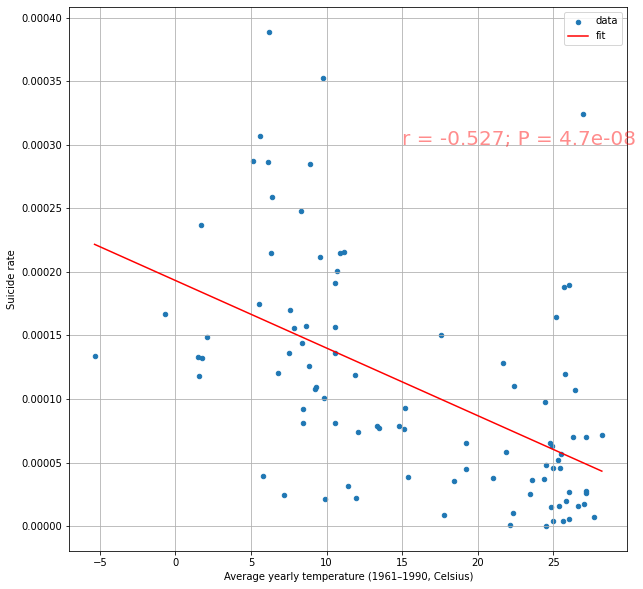

In [34]:
mergeddata.plot.scatter(x= 'Average yearly temperature (1961–1990, Celsius)', y= 'Suicide rate', figsize=(10,10), label='data') 
plt.plot(xfit, yfit, 'r', label='fit') ; 
plt.legend()
plt.grid()
plt.text(15, 0.0003, f'r = {r:.3g}; P = {p:.3g}', fontsize=20, color='r', alpha=0.45); 

# Conclusion

There is weak negative correlation between average yearly temperature and suicide rate. This means that warmer local climate, lower suicide rate. 